In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load your lung cancer dataset from a CSV file
lung_cancer_data = pd.read_csv("lung_cancer.csv")

In [7]:
lung_cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
lung_cancer_data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [17]:
# Separate the features (X) and the target variable (y)
X = lung_cancer_data.drop(['GENDER','LUNG_CANCER'], axis=1)  
X
Y = lung_cancer_data[['GENDER','LUNG_CANCER']]
Y

,GENDER,LUNG_CANCER
0,M,YES
1,M,YES
2,F,NO
3,M,NO
4,F,NO
...,...,...
304,F,YES
305,M,YES
306,M,YES
307,M,YES


In [18]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[ 0.77185028, -1.13529242,  0.86929961, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 1.38182914,  0.88083033, -1.15035137, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-0.44810745, -1.13529242, -1.15035137, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [-0.57010322,  0.88083033, -1.15035137, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.52785873,  0.88083033, -1.15035137, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-0.08212013, -1.13529242, -1.15035137, ..., -1.33558369,
         1.06350105, -1.12047956]])

In [20]:
# Perform PCA
pca = PCA(n_components=2)  # We'll reduce it to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)


In [21]:
X_pca

array([[ 0.20104012,  0.33636883],
       [ 0.49709819, -0.57120594],
       [ 1.4178369 , -1.51039817],
       [-1.89078842,  1.46575796],
       [ 0.49315961, -1.33490074],
       [ 1.2655073 , -1.1508025 ],
       [ 2.41902654, -0.77038551],
       [-2.19125587, -1.2545249 ],
       [-0.91285045, -1.68803652],
       [-2.19628611,  2.44248911],
       [-1.65060738, -1.12730133],
       [ 2.99855456,  0.42670202],
       [ 0.40065164, -2.86980867],
       [ 2.93876746, -0.02299865],
       [ 2.18691802,  1.83076914],
       [-1.07560913, -0.47531882],
       [ 2.50953966,  1.2327276 ],
       [-2.6728455 ,  1.78760746],
       [-1.43510456, -2.07215476],
       [ 0.40430274, -2.54036477],
       [-2.85328424, -1.77132445],
       [-1.66789852,  1.18486375],
       [ 0.58810637, -2.29885742],
       [ 2.94740377, -0.00449761],
       [-0.98497294,  3.10501326],
       [ 0.1837675 ,  0.29936674],
       [-0.60624359,  0.38712858],
       [ 1.46101843, -1.41789296],
       [-1.12955088,

In [22]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.19061209 0.12877915]


In [25]:
# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df[['GENDER','LUNG_CANCER']] = Y

In [26]:
pca_df

,Principal Component 1,Principal Component 2,GENDER,LUNG_CANCER
0,0.201040,0.336369,M,YES
1,0.497098,-0.571206,M,YES
2,1.417837,-1.510398,F,NO
3,-1.890788,1.465758,M,NO
4,0.493160,-1.334901,F,NO
...,...,...,...,...
304,0.243653,-0.802614,F,YES
305,2.990585,0.088008,M,YES
306,2.139418,1.729013,M,YES
307,1.556559,-0.161618,M,YES


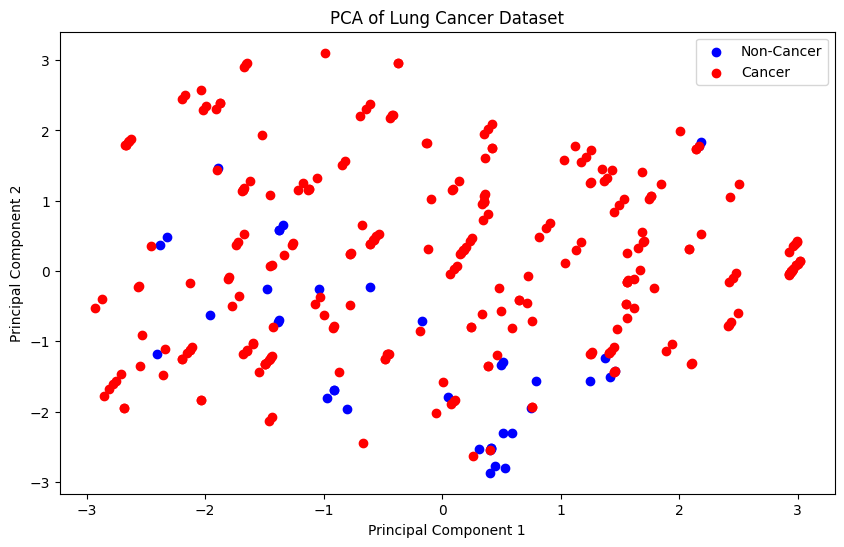

In [33]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_df[pca_df['LUNG_CANCER'] == 'NO']['Principal Component 1'],
    pca_df[pca_df['LUNG_CANCER'] == 'NO']['Principal Component 2'],
    label='Non-Cancer',
    c='blue'
)
plt.scatter(
    pca_df[pca_df['LUNG_CANCER'] == 'YES']['Principal Component 1'],
    pca_df[pca_df['LUNG_CANCER'] == 'YES']['Principal Component 2'],
    label='Cancer',
    c='red'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Lung Cancer Dataset')
plt.legend()
plt.show()